#Adquirindo a imagem

In [ ]:
#Aquisição das imagens
!wget -O "Neymar.jpg" "https://www1.pictures.zimbio.com/gi/Brazil+v+Paraguay+2018+FIFA+World+Cup+Russia+V0wrwQWpyTNx.jpg"
!wget -O "Ronaldinho.jpg" "https://riotimes-11af1.kxcdn.com/wp-content/uploads/2019/09/Ronaldinho-Gaucho.jpg"
!wget -O "lewandowski.jpg" "https://th.bing.com/th/id/OIP.qADGrCjNyPTg-fi6BLM56QHaJo?pid=Api&w=718&h=934&rs=1"

#Teste de exibição da imagem

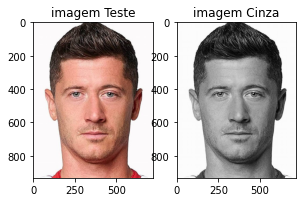

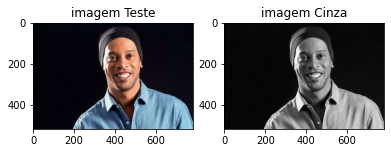

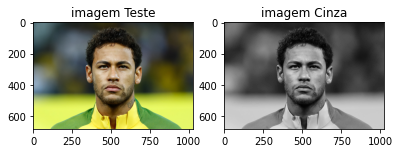

In [ ]:
#Bibliotecas Importadas

import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

#Leitura da imagem e criação de uma cópia em tons de cinza
#Para nos ajudar durante a detecção

img1 = cv.imread('lewandowski.jpg')
img2 = cv.imread('Ronaldinho.jpg')
img3 = cv.imread('Neymar.jpg')


img1 = cv.cvtColor(img1,cv.COLOR_BGR2RGB)
gray = cv.cvtColor(img1, cv.COLOR_BGR2GRAY)

img2 = cv.cvtColor(img2,cv.COLOR_BGR2RGB)
gray2 = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)

img3 = cv.cvtColor(img3,cv.COLOR_BGR2RGB)
gray3 = cv.cvtColor(img3, cv.COLOR_BGR2GRAY)


#Exibição da imagem
plt.figure(figsize=(15,12))
plt.subplot(261), plt.imshow(img1), plt.title('imagem Teste')
plt.subplot(262), plt.imshow(gray, cmap = 'gray'), plt.title('imagem Cinza')

plt.figure(figsize=(20,10))
plt.subplot(261), plt.imshow(img2), plt.title('imagem Teste')
plt.subplot(262), plt.imshow(gray2, cmap = 'gray'), plt.title('imagem Cinza')

plt.figure(figsize=(20,10))
plt.subplot(261), plt.imshow(img3), plt.title('imagem Teste')
plt.subplot(262), plt.imshow(gray3, cmap = 'gray'), plt.title('imagem Cinza')


plt.show()


#Procedimento para detecção de faces

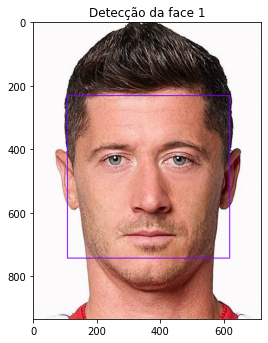

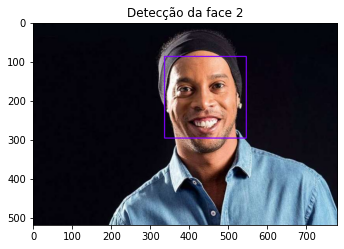

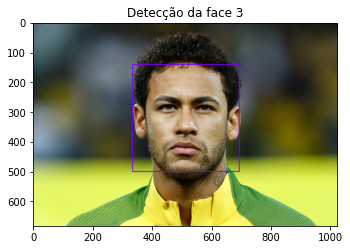

In [ ]:
#Definindo onde salvar o XML da deteção
face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

#Retorna a face detectada(Region of interest) como uma tupla
def detectandoFace(cinza):
  faces = face_classifier.detectMultiScale(cinza, 1.3, 5)
  return faces

# #Se não detectar faces,retorna que não encontrou
# if faces is ():
#   print("Nenhuma face encontrada")

#Impressão da imagem 1 com o overlay de detecção
for (x,y,w,h) in detectandoFace(gray):
  cv.rectangle(img1, (x,y), (x+w,y+h), (127,0,255), 2)
  plt.figure(figsize=(12,12))
  plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
  plt.subplot(221), plt.imshow(img1), plt.title('Detecção da face 1')
  plt.show()

for (x,y,w,h) in detectandoFace(gray2):
  cv.rectangle(img2, (x,y), (x+w,y+h), (127,0,255), 2)
  plt.figure(figsize=(12,12))
  plt.imshow(cv.cvtColor(img2, cv.COLOR_BGR2RGB))
  plt.subplot(221), plt.imshow(img2), plt.title('Detecção da face 2')
  plt.show()

for (x,y,w,h) in detectandoFace(gray3):
  cv.rectangle(img3, (x,y), (x+w,y+h), (127,0,255), 2)
  plt.figure(figsize=(12,12))
  plt.imshow(cv.cvtColor(img3, cv.COLOR_BGR2RGB))
  plt.subplot(221), plt.imshow(img3), plt.title('Detecção da face 3')
  plt.show()
  

#Procedimento adicionando a detecção dos olhos a de face

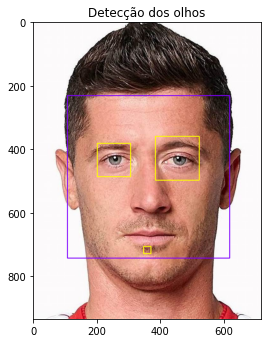

In [ ]:
# Definindo onde salvar o XML da deteção
face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

#Retorna a face detectada(Region of interest) como uma tupla
# faces = face_classifier.detectMultiScale(gray, 1.3, 5)
def detectandoFace(cinza):
  faces = face_classifier.detectMultiScale(cinza, 1.3, 5)
  return faces

#Se não detectar faces,retorna que não encontrou
# if faces is ():
#     print("Nenhuma face encontrada.")


#Impressão da imagem com o overlay de detecção
for (x,y,w,h) in detectandoFace(gray):
    cv.rectangle(img1,(x,y),(x+w,y+h),(127,0,255),2)
    
    #Detecção dos olhos(Region of Interest)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img1[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray)

    for (ex,ey,ew,eh) in eyes :
        cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)
  
    #Exibição da imagem com os devidos overlays
    plt.figure(figsize=(12,12))
    plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
    plt.subplot(221), plt.imshow(img1), plt.title('Detecção dos olhos')
    plt.show()
        

# Procedimento de exibição de imagem

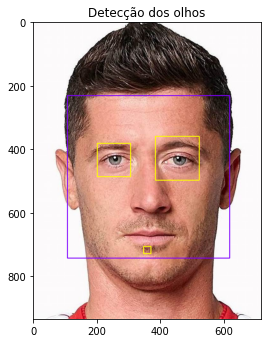

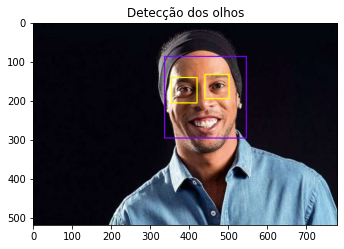

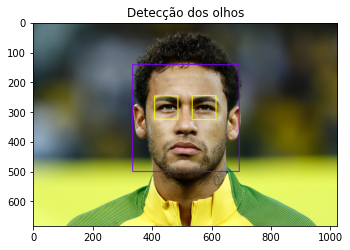

In [ ]:
def exibe_imagem(img_x, gray_x):
  #Definindo onde salvar o XML da deteção
  face_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')
  eye_classifier = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_eye.xml')

  #Retorna a face detectada(Region of interest) como uma tupla
  faces = face_classifier.detectMultiScale(gray_x, 1.3, 5)


  #Se não detectar faces,retorna que não encontrou
  if faces is ():
    print("Nenhuma face encontrada.")


  #Impressão da imagem com o overlay de detecção
  for (x,y,w,h) in faces:
    cv.rectangle(img_x,(x,y),(x+w,y+h),(127,0,255),2)
    
  #Detecção dos olhos(Region of Interest)
  roi_gray = gray_x[y:y+h, x:x+w]
  roi_color = img_x[y:y+h, x:x+w]
  eyes = eye_classifier.detectMultiScale(roi_gray)

  for (ex,ey,ew,eh) in eyes :
    cv.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)


  #Exibição da imagem com os devidos overlays
  plt.figure(figsize=(12,12))
  plt.imshow(cv.cvtColor(img_x, cv.COLOR_BGR2RGB))
  plt.subplot(221), plt.imshow(img_x), plt.title('Detecção dos olhos')
  plt.show()

exibe_imagem(img1, gray)
exibe_imagem(img2, gray2)
exibe_imagem(img3, gray3)